# Testes de hipóteses com bootstrap

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

np.random.seed(0)
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,7)

In [2]:
lift = 1.1
test = np.random.binomial(100, p=0.2 * lift, size=10_000)
ctrl = np.random.binomial(100, p=0.2, size=50_000)

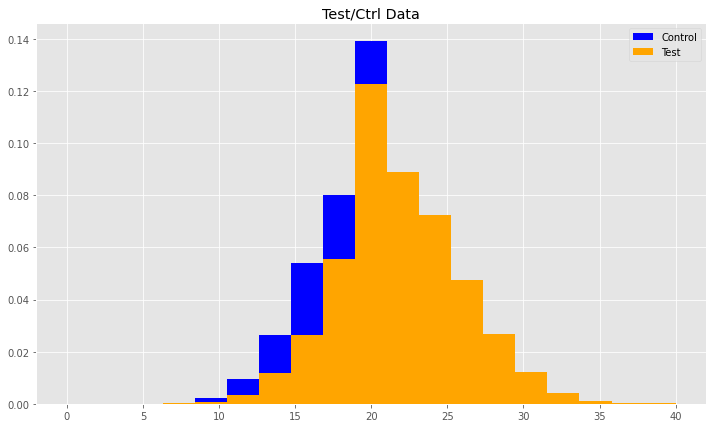

In [3]:
bins = np.linspace(0, 40, 20)

plt.hist(ctrl, bins=bins, label='Control', color='blue', density=True)
plt.hist(test, bins=bins, label='Test', color='orange', density=True)
plt.title('Test/Ctrl Data')
plt.legend();

In [4]:
from scipy import stats

print("teste: {0}".format(stats.describe(test)))
print("control: {0}".format(stats.describe(ctrl)))

teste: DescribeResult(nobs=10000, minmax=(8, 40), mean=21.9463, variance=17.36535284528453, skewness=0.11958673691259965, kurtosis=0.048767328505609164)
control: DescribeResult(nobs=50000, minmax=(7, 37), mean=19.97722, variance=15.963180335206706, skewness=0.14783150696774738, kurtosis=-0.016679594510829787)


In [5]:
def boostrapper(A_vec, B_vec, sample_size, resample):
    A_avg_vec = A_vec[(np.random.rand(resample, sample_size)*len(A_vec)).astype(int)].mean(axis = 1)
    B_avg_vec = B_vec[(np.random.rand(resample, sample_size)*len(B_vec)).astype(int)].mean(axis = 1)
    return A_avg_vec, B_avg_vec

In [6]:
A_avg_vec, B_avg_vec = boostrapper(test, ctrl, 100, 500)

Distribuição a posterior aproximada dos parâmetros!

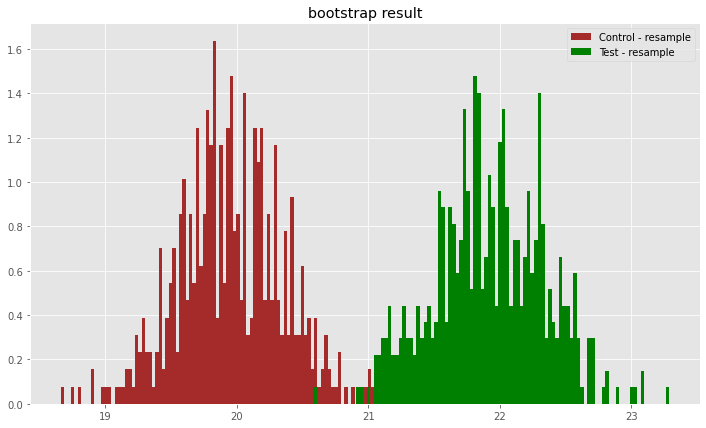

In [7]:
bins = 100

plt.hist(B_avg_vec, bins=bins, label='Control - resample', color='brown', density=True)
plt.hist(A_avg_vec, bins=bins, label='Test - resample', color='green', density=True)
plt.title('bootstrap result')
plt.legend();

In [8]:
print("teste: {0}".format(stats.describe(A_avg_vec)))
print("control: {0}".format(stats.describe(B_avg_vec)))

teste: DescribeResult(nobs=500, minmax=(20.58, 23.29), mean=21.921479999999995, variance=0.17646794549098196, skewness=0.01164490935030453, kurtosis=-0.10075897783126342)
control: DescribeResult(nobs=500, minmax=(18.66, 21.23), mean=19.95222, variance=0.16338163486973944, skewness=0.022356209810939852, kurtosis=0.23801488989403108)


In [9]:
#realizando o teste após o bootstap

In [10]:
from scipy import stats

stats.ttest_ind(A_avg_vec,B_avg_vec)

Ttest_indResult(statistic=75.53438415533047, pvalue=0.0)

# agora testando com dados assimétricos

In [11]:
lift = 1.003

test = np.random.gamma(shape = 5*lift, scale = 1/4, size=10_000)
ctrl = np.random.gamma(shape = 5, scale = 1/4, size=50_000)

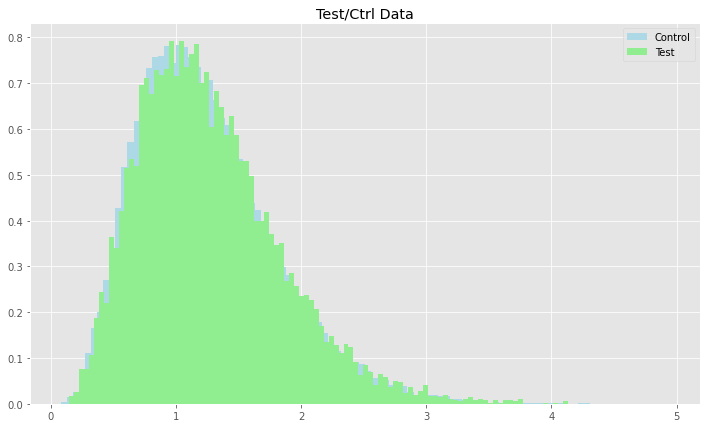

In [12]:
bins = 100

plt.hist(ctrl, bins=bins, label='Control', color='lightblue', density=True)
plt.hist(test, bins=bins, label='Test', color='lightgreen', density=True)
plt.title('Test/Ctrl Data')
plt.legend();

In [13]:
from scipy import stats

print("teste: {0}".format(stats.describe(test)))
print("control: {0}".format(stats.describe(ctrl)))

teste: DescribeResult(nobs=10000, minmax=(0.14976554953578405, 4.130606657486801), mean=1.2716842640099308, variance=0.3183608228070156, skewness=0.8639438679905289, kurtosis=1.0228665558833336)
control: DescribeResult(nobs=50000, minmax=(0.0793646083703501, 4.940384887954023), mean=1.2459066625562345, variance=0.31016241740733064, skewness=0.8774143013678638, kurtosis=1.0805788800718164)


In [14]:
def boostrapper(A_vec, B_vec, sample_size, resample):
    A_avg_vec = A_vec[(np.random.rand(resample, sample_size)*len(A_vec)).astype(int)].mean(axis = 1)
    B_avg_vec = B_vec[(np.random.rand(resample, sample_size)*len(B_vec)).astype(int)].mean(axis = 1)
    return A_avg_vec, B_avg_vec

In [15]:
A_avg_vec, B_avg_vec = boostrapper(test, ctrl, 100, 500)

Distribuição a posterior aproximada dos parâmetros!

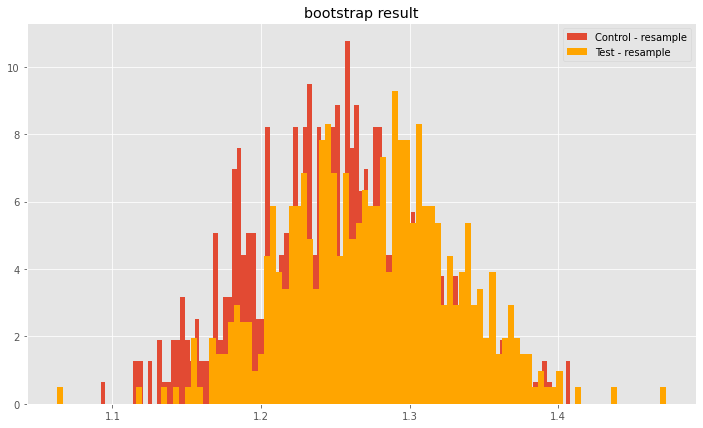

In [16]:
bins = 100

plt.hist(B_avg_vec, bins=bins, label='Control - resample', density=True)
plt.hist(A_avg_vec, bins=bins, label='Test - resample', color='orange', density=True)
plt.title('bootstrap result')
plt.legend();

In [17]:
#probabilidade da diferença entre A e B ser maior que zero.
sum(A_avg_vec - B_avg_vec > 0)/len(A_avg_vec)

0.606

In [18]:
#realizando o teste após o bootstap

In [19]:
from scipy import stats

stats.ttest_ind(A_avg_vec,B_avg_vec)

Ttest_indResult(statistic=7.745853108723204, pvalue=2.326190675450001e-14)

# Modelo em produção

# Gerando um dataset e treinando um modelo

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [21]:
rng = np.random.RandomState(0)
X, y = make_classification(n_samples=100_000, n_features=5, random_state=rng)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Ajustando um random forest

In [23]:
clf = RandomForestClassifier(n_estimators=10, random_state=rng)
model = clf.fit(X_train, y_train)

In [24]:
pred = model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, recall_score, precision_score

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     14957
           1       0.91      0.89      0.90     15043

    accuracy                           0.90     30000
   macro avg       0.90      0.90      0.90     30000
weighted avg       0.90      0.90      0.90     30000



In [27]:
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 809.5 kB/s eta 0:00:0031m10.8 MB/s eta 0:00:01


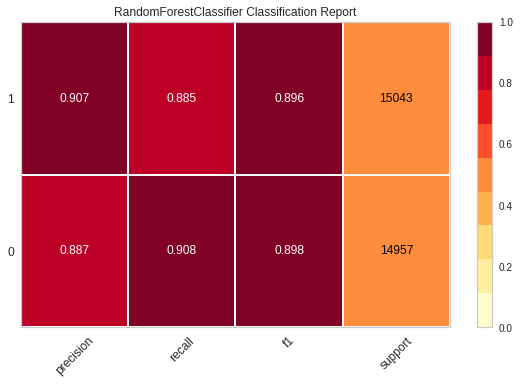

In [28]:
from yellowbrick.classifier import ClassificationReport

viz = ClassificationReport(RandomForestClassifier(n_estimators=10, random_state=rng), 
                           cmap='YlOrRd', support=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [29]:
model_metrics = dict()

model_metrics['recall'] = recall_score(y_test, pred)
model_metrics['precision'] = precision_score(y_test, pred)

In [30]:
model_metrics

{'recall': 0.8854616765272885, 'precision': 0.9072951433826034}

In [31]:
!mkdir metrics

In [32]:
import json

with open('metrics/model_metrics_version_clf.json', 'w') as fp:
    json.dump(model_metrics, fp)

## Salvando modelo

In [33]:
from joblib import dump, load

In [34]:
!mkdir models

In [35]:
dump(clf, 'models/clf.joblib') 

['models/clf.joblib']

# Criando API

In [37]:
!pip install flask

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 358.7 kB/s eta 0:00:0031m10.0 MB/s eta 0:00:01
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)


In [38]:
from flask import Flask, request, url_for, redirect, render_template, jsonify
import numpy as np
import pandas as pd

In [39]:
app = Flask(__name__)

In [40]:
model = load('models/clf.joblib')

In [41]:
@app.route('/')
def home():
    return render_template('templates/template.html')

In [42]:
@app.route('/predict', methods = ['POST'])
def predict():
    #request of all inputs
    features = [x for x in request.form.values()]
    
    #data preparing
    features_array = np.array(features)
    pandas_features = pd.DataFrame([features_array])
    print(features)
    
    #predict
    pred = model.predict(pandas_features)
    print(pred)
    prediction = int(pred[0])
    return render_template("home.html", pred = "prediction: {}".format(prediction))

In [43]:
@app.route('/model_health/<model_id>', methods = ['GET'])
def model_health(model_id):
    with open('metrics/model_metrics_version_{0}.json'.format(model_id)) as f:
        model_metrics = json.load(f)    
        return model_metrics